In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("C:\\Users\\Sagar\\Downloads\\Tips Quick EDA exercise v0.1 (5).xlsx")
df = df.dropna(axis=0,how='any')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0


In [3]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size          float64
dtype: object

In [4]:
tip = df.iloc[:,1:2]
tip

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [5]:
avg = df['tip'].mean()
print("The overall average tip is :-",avg)

The overall average tip is :- 2.9982786885245902


In [6]:
medianTip = df['tip'].median()
print("The median of tip is :-", medianTip)

The median of tip is :- 2.9


There are outliers.


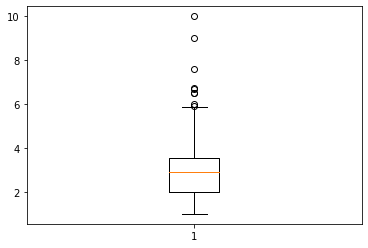

In [7]:
plt.boxplot(df['tip'])
print("There are outliers.")

There are outliers.


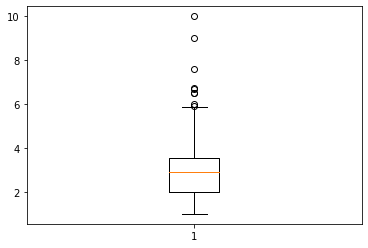

In [8]:
plt.boxplot(df['tip'])
print("There are outliers.")

In [9]:
(df['sex'].value_counts()/df['sex'].count())*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

In [10]:
print("Percentage of female is :- 35.655738%")

Percentage of female is :- 35.655738%


Text(0, 0.5, 'Percentage of Population')

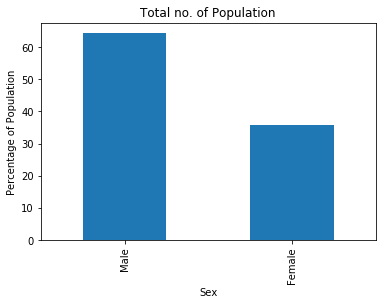

In [11]:
(((df['sex'].value_counts()/df['sex'].count())*100).plot(kind='bar'))
plt.title('Total no. of Population')
plt.xlabel('Sex')
plt.ylabel('Percentage of Population')

In [12]:
df.groupby(['sex'])['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [13]:
print("Yes, the avg tip differ by gender. Avg tip of male is more than the female ")

Yes, the avg tip differ by gender. Avg tip of male is more than the female 


In [14]:
df.groupby(['time'])['tip'].mean()

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

In [15]:
print("Yes, the avg tip differ by time. ")

Yes, the avg tip differ by time. 


In [16]:
df.groupby(['day'])['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [17]:
print("Yes,the avg tip differ by day. ")

Yes,the avg tip differ by day. 


In [18]:
df.groupby(['size'])['tip'].mean()

size
1.0    1.437500
2.0    2.582308
3.0    3.393158
4.0    4.135405
5.0    4.028000
6.0    5.225000
Name: tip, dtype: float64

In [19]:
print("Yes,the avg tip differ by the size. ")

Yes,the avg tip differ by the size. 


In [20]:
df.groupby(['smoker'])['tip'].sum()

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

In [21]:
print("No, smokers tip is less than the non-smoker")

No, smokers tip is less than the non-smoker


In [22]:
df.groupby(['sex','smoker']).agg({'tip':['size','mean']}).rename(columns={'size':'tip_size','mean':'avg_tip_size'})

tip             
              tip_size avg_tip_size
sex    smoker                      
Female No           54     2.773519
       Yes          33     2.931515
Male   No           97     3.113402
       Yes          60     3.051167

In [23]:
df.insert(2,"pct_tip",df['tip']/df['total_bill'])
df

,total_bill,tip,pct_tip,sex,smoker,day,time,size
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2.0
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3.0
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3.0
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2.0
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,0.203927,Male,No,Sat,Dinner,3.0
240,27.18,2.00,0.073584,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,0.088222,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,0.098204,Male,No,Sat,Dinner,2.0


In [24]:
g = df.groupby(['sex'])['pct_tip'].sum()
g

sex
Female    14.484694
Male      24.751136
Name: pct_tip, dtype: float64

In [25]:
print("Therefore, the percentage of tip differ by gender")

Therefore, the percentage of tip differ by gender


In [26]:
df1 = df.groupby(['size'])['pct_tip'].sum()
df1

size
1.0     0.869168
2.0    25.852194
3.0     5.781960
4.0     5.400113
5.0     0.707477
6.0     0.624917
Name: pct_tip, dtype: float64

In [27]:
f = df.groupby(['sex','smoker'])['pct_tip'].sum()
f

sex     smoker
Female  No         8.473732
        Yes        6.010962
Male    No        15.584865
        Yes        9.166271
Name: pct_tip, dtype: float64

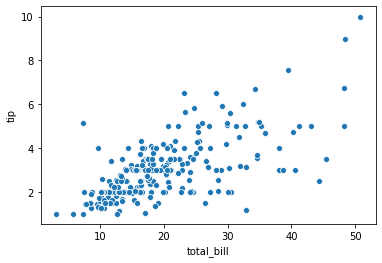

In [28]:
sns.scatterplot(x='total_bill',y='tip',data=df)

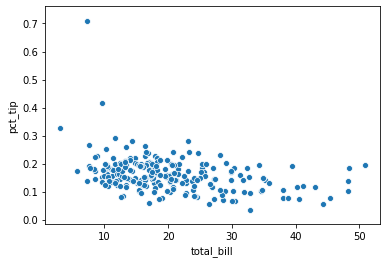

In [29]:
sns.scatterplot(x='total_bill',y='pct_tip',data=df)